于linux中执行下述代码
```bash
mkdir -p /mnt/user/lanc/models
for file in /mnt/user/lanc/maize/*.fa; do 
    base=$(basename "$file" .fa)
    echo "正在处理 $file ..."
    carve --dna -o /mnt/user/lanc/models/"${base}"_model.json "$file"
done
```
利用Carve工具对基因组进行批量建模，生成模型文件，存放在`/mnt/user/lanc/models`目录下。

In [1]:
import os
from os.path import join, splitext, getsize
import cobra  # 请确保已安装 cobra 包

# 模型存放的目录（根据实际情况修改）
model_dir = "models"

# 模型文件列表，注意文件名虽然后缀为 .json，但内容实际上是 SBML（XML格式）
model_files = [
    "Burkholderia.gladioli_10_model.json",
    "Burkholderia.gladioli_11_model.json",
    "Burkholderia.gladioli_12_model.json",
    "Burkholderia.gladioli_13_model.json",
    "Burkholderia.gladioli_14_model.json",
    "Burkholderia.gladioli_15_model.json",
    "Burkholderia.gladioli_16_model.json",
    "Burkholderia.gladioli_17_model.json",
    "Burkholderia.gladioli_18_model.json",
    "Burkholderia.gladioli_19_model.json",
    "Burkholderia.gladioli_1_model.json",
    "Burkholderia.gladioli_20_model.json",
    "Burkholderia.gladioli_21_model.json",
    "Burkholderia.gladioli_22_model.json",
    "Burkholderia.gladioli_23_model.json",
    "Burkholderia.gladioli_2_model.json",
    "Burkholderia.gladioli_3_model.json",
    "Burkholderia.gladioli_4_model.json",
    "Burkholderia.gladioli_5_model.json",
    "Burkholderia.gladioli_6_model.json",
    "Burkholderia.gladioli_7_model.json",
    "Burkholderia.gladioli_8_model.json",
    "Burkholderia.gladioli_9_model.json",
    "Pantoea.dispersa_10_model.json",
    "Pantoea.dispersa_11_model.json",
    "Pantoea.dispersa_12_model.json",
    "Pantoea.dispersa_13_model.json",
    "Pantoea.dispersa_14_model.json",
    "Pantoea.dispersa_15_model.json",
    "Pantoea.dispersa_16_model.json",
    "Pantoea.dispersa_17_model.json",
    "Pantoea.dispersa_18_model.json",
    "Pantoea.dispersa_19_model.json",
    "Pantoea.dispersa_20_model.json",
    "Pantoea.dispersa_21_model.json",
    "Pantoea.dispersa_22_model.json",
    "Pantoea.dispersa_23_model.json",
    "Pantoea.dispersa_24_model.json",
    "Pantoea.dispersa_25_model.json",
    "Pantoea.dispersa_26_model.json",
    "Pantoea.dispersa_27_model.json",
    "Pantoea.dispersa_28_model.json",
    "Pantoea.dispersa_29_model.json",
    "Pantoea.dispersa_2_model.json",
    "Pantoea.dispersa_3_model.json",
    "Pantoea.dispersa_4_model.json",
    "Pantoea.dispersa_5_model.json",
    "Pantoea.dispersa_6_model.json",
    "Pantoea.dispersa_7_model.json",
    "Pantoea.dispersa_8_model.json",
    "Pantoea.dispersa_9_model.json",
    "Pantoea.dispersa_B_model.json",
    "Pantoea.dispersa_model.json",
    "Pantoea.stewartii_2_model.json",
    "Pantoea.stewartii_3_model.json",
    "Pantoea.stewartii_4_model.json",
    "Pantoea.stewartii_5_model.json",
    "Pantoea.stewartii_model.json"
]

# 修改后的物种缩写映射（根据你的要求进行调整）
species_mapping = {
    "Burkholderia.gladioli": "Bg",
    "Pantoea.dispersa": "Pd",
    "Pantoea.stewartii": "Ps"
}

# 初始化计数器，每个物种一组连续编号
counters = {species: 1 for species in species_mapping}

# 保存加载后的模型
models = {}

for file_name in model_files:
    file_path = join(model_dir, file_name)
    
    # 检查文件是否为空
    if os.path.getsize(file_path) == 0:
        print(f"加载模型失败: {file_path}, 错误: 文件为空")
        continue

    try:
        # 使用 SBML 加载函数读取模型
        model = cobra.io.read_sbml_model(file_path)
    except Exception as e:
        print(f"加载模型失败: {file_path}, 错误: {e}")
        continue

    new_key = None
    # 根据文件名前缀分配新的键名（例如 Bg_1_model, Pd_1_model 等）
    for species, prefix in species_mapping.items():
        if file_name.startswith(species):
            new_key = f"{prefix}_{counters[species]}_model"
            counters[species] += 1
            break
    if new_key is None:
        new_key = splitext(file_name)[0]
    
    models[new_key] = model

print("成功加载的模型：")
for key in models:
    print(key)


Adding exchange reaction EX_26dap__M_e with default bounds for boundary metabolite: 26dap__M_e.
Adding exchange reaction EX_2m35mdntha_e with default bounds for boundary metabolite: 2m35mdntha_e.
Adding exchange reaction EX_34dhbz_e with default bounds for boundary metabolite: 34dhbz_e.
Adding exchange reaction EX_35dnta_e with default bounds for boundary metabolite: 35dnta_e.
Adding exchange reaction EX_LalaDgluMdapDala_e with default bounds for boundary metabolite: LalaDgluMdapDala_e.
Adding exchange reaction EX_LalaDgluMdap_e with default bounds for boundary metabolite: LalaDgluMdap_e.
Adding exchange reaction EX_R3hdec4e_e with default bounds for boundary metabolite: R3hdec4e_e.
Adding exchange reaction EX_R_3hpba_e with default bounds for boundary metabolite: R_3hpba_e.
Adding exchange reaction EX_ac_e with default bounds for boundary metabolite: ac_e.
Adding exchange reaction EX_acac_e with default bounds for boundary metabolite: acac_e.
Adding exchange reaction EX_acetone_e with

成功加载的模型：
Bg_1_model
Bg_2_model
Bg_3_model
Bg_4_model
Bg_5_model
Bg_6_model
Bg_7_model
Bg_8_model
Bg_9_model
Bg_10_model
Bg_11_model
Bg_12_model
Bg_13_model
Bg_14_model
Bg_15_model
Bg_16_model
Bg_17_model
Bg_18_model
Bg_19_model
Bg_20_model
Bg_21_model
Bg_22_model
Bg_23_model
Pd_1_model
Pd_2_model
Pd_3_model
Pd_4_model
Pd_5_model
Pd_6_model
Pd_7_model
Pd_8_model
Pd_9_model
Pd_10_model
Pd_11_model
Pd_12_model
Pd_13_model
Pd_14_model
Pd_15_model
Pd_16_model
Pd_17_model
Pd_18_model
Pd_19_model
Pd_20_model
Pd_21_model
Pd_22_model
Pd_23_model
Pd_24_model
Pd_25_model
Pd_26_model
Pd_27_model
Pd_28_model
Pd_29_model
Pd_30_model
Ps_1_model
Ps_2_model
Ps_3_model
Ps_4_model
Ps_5_model


Model: Burkholderia_gladioli_10_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_11_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_12_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_13_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_14_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_15_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_16_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_17_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_18_model
No reactions found with ['n2_e', 'n2_p', 'n2_c'] as a reactant.
Model: Burkholderia_gladioli_19_model
No reactions found with ['n2_e', 'n2_p', 'n2

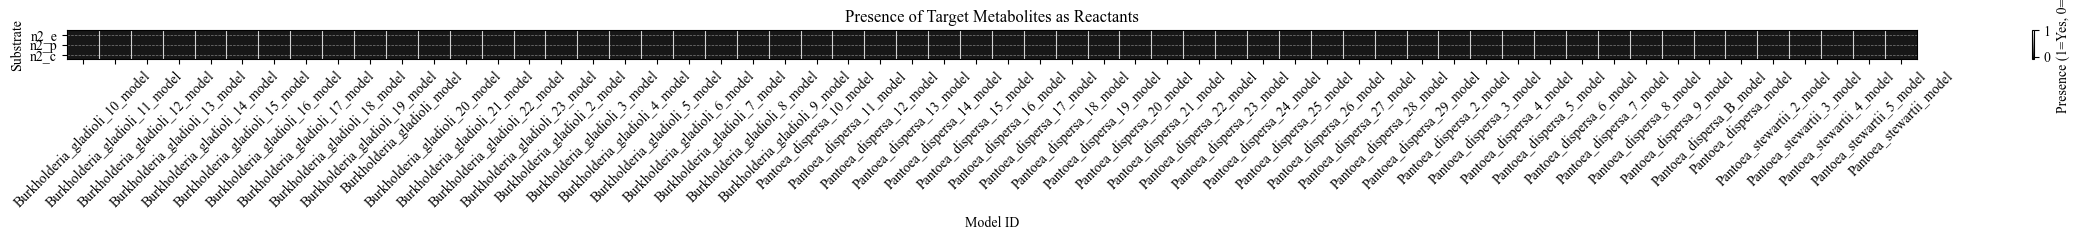

----------------------------------------


In [9]:
import numpy as np
import matplotlib.pyplot as plt

metabolite_ids = ["n2_e", "n2_p", "n2_c"]

# 遍历所有模型，查找以指定代谢物为反应物的反应，并打印相关信息
for model in models.values():
    matches = [rxn for rxn in model.reactions 
               if any(met.id in metabolite_ids for met in rxn.reactants)]
    print(f"Model: {model.id}")
    if matches:
        for rxn in matches:
            print(f"{rxn.id}: {rxn.reaction}\nGPR: {rxn.gene_reaction_rule}\n")
    else:
        print(f"No reactions found with {metabolite_ids} as a reactant.")

# 获取所有模型的ID，并构建一个布尔型矩阵：行为代谢物，列为模型
model_ids = [model.id for model in models.values()]
substrate_matrix = np.array([
    [any(met.id == met_id for rxn in model.reactions for met in rxn.reactants)
     for model in models.values()]
    for met_id in metabolite_ids
])

# 绘制矩阵图
plt.figure(figsize=(24, 2.5))
plt.imshow(substrate_matrix, cmap='gray', aspect='auto', interpolation='nearest', vmin=0, vmax=1)
plt.xticks(np.arange(len(model_ids)), model_ids, rotation=45)
plt.yticks(np.arange(len(metabolite_ids)), metabolite_ids)
plt.xlabel('Model ID')
plt.ylabel('Substrate')
plt.title('Presence of Target Metabolites as Reactants')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)
for x in range(len(model_ids)):
    plt.axvline(x - 0.5, color='lightgray', linestyle='-', linewidth=0.8)
plt.clim(1, 0)  # 黑色表示存在（True/1），白色表示不存在（False/0）
plt.colorbar(label='Presence (1=Yes, 0=No)', ticks=[0, 1])
plt.tight_layout()
plt.show()

print("-" * 40)


In [8]:
import cobra
# "nitrogenase" 表示固氮酶相关，
# "FeS", "MoFe" 与 Fe-S 簇或 MoFe 中心相关，
# "ISC" 和 "SUF" 可能与 Fe-S 簇的生物合成/装配系统有关。
keywords = ["nitrogenase", "FeS", "MoFe", "ISC", "SUF"]

# 查询蛋白/基因部分
print("符合关键词的蛋白/基因：")
found_gene = False  # 用于判断是否查找到相关基因
for model_key, model in models.items():
    for gene in model.genes:
        # 获取基因注释中可能的 BiGG 标识，如果不存在，则标记为“无注释信息”
        bigg_info = gene.annotation.get("bigg_id", "无注释信息")
        # 将 gene.id 和 bigg_info 合并成一个小写字符串，便于后续关键词匹配
        info_str = gene.id.lower() + " " + bigg_info.lower()
        
        # 若查询字符串中含有任意一个关键词，则输出该基因信息
        if any(keyword.lower() in info_str for keyword in keywords):
            found_gene = True
            print(f"模型: {model_key}, 基因ID: {gene.id}, 名称: {gene.name}, BiGG标识: {bigg_info}")

# 如果没有匹配到任何基因，则输出提示信息
if not found_gene:
    print("未找到符合关键词的蛋白/基因！")

# 查询反应部分
print("\n符合关键词的反应：")
found_rxn = False  # 用于判断是否查找到相关反应
for model_key, model in models.items():
    for rxn in model.reactions:
        # 获取反应注释中的 BiGG 信息，如不存在，则返回“无注释信息”
        rxn_info = rxn.annotation.get("bigg_id", "无注释信息").lower()
        # 将反应ID、名称及 BiGG 信息合并为一个小写字符串
        info_str = rxn.id.lower() + " " + rxn.name.lower() + " " + rxn_info
        
        # 如果查询字符串里包含任一关键词，则输出该反应信息
        if any(keyword.lower() in info_str for keyword in keywords):
            found_rxn = True
            print(f"模型: {model_key}, 反应ID: {rxn.id}, 名称: {rxn.name}")

# 如果没有匹配到任何反应，则输出提示信息
if not found_rxn:
    print("未找到符合关键词的反应！")


符合关键词的蛋白/基因：
未找到符合关键词的蛋白/基因！

符合关键词的反应：
模型: Bg_10_model, 反应ID: CYSK2_I, 名称: O-Phospho-L-Serine-dependent S-Suflocysteine Synthase


In [7]:
CYSK2_I = models['Bg_10_model'].reactions.get_by_id("CYSK2_I")
CYSK2_I

Reaction identifier,CYSK2_I
Name,O-Phospho-L-Serine-dependent S-Suflocysteine Synthase
Memory address,0x24b30000710
Stoichiometry,h_c + pser__L_c + tsul_c --> pi_c + scys__L_c H+ + O-Phospho-L-serine + Thiosulfate --> Phosphate + S-Sulfo-L-cysteine
GPR,bin2_fa_302
Lower bound,0.0
Upper bound,1000.0
